In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import json

from datetime import datetime, timedelta

## 1st data

In [3]:
# Read the Parquet file
df = pd.read_parquet('Binance_BTCUSDT_20241022_212041_7200.parquet')

# Print the DataFrame
df

,ts,bids,asks
0,2024-10-22 11:20:42.711,"[[1000.000, 141.322], [5000.000, 6.691], [3300...","[[67427.300, 0.858], [67428.400, 0.000], [6743..."
1,2024-10-22 11:20:42.968,"[[1000.000, 141.322], [5000.000, 6.691], [6068...","[[67427.300, 0.857], [67432.200, 1.082], [6743..."
2,2024-10-22 11:20:43.220,"[[1000.000, 141.322], [5000.000, 6.711], [3300...","[[67427.300, 0.000], [67427.400, 0.000], [6742..."
3,2024-10-22 11:20:43.467,"[[1000.000, 141.322], [5000.000, 6.691], [1000...","[[67434.000, 1.698], [67434.200, 0.000], [6743..."
4,2024-10-22 11:20:43.719,"[[1000.000, 141.322], [5000.000, 6.711], [6574...","[[67434.000, 0.390], [67435.900, 0.002], [6743..."
...,...,...,...
28321,2024-10-22 13:20:40.698,"[[1000.000, 141.322], [5000.000, 6.671], [6082...","[[67580.000, 0.000], [67583.500, 8.075], [6758..."
28322,2024-10-22 13:20:40.950,"[[1000.000, 141.322], [5000.000, 6.691], [3300...","[[67583.500, 7.838], [67583.800, 0.147], [6758..."
28323,2024-10-22 13:20:41.202,"[[1000.000, 141.322], [5000.000, 6.671], [6082...","[[67584.900, 0.002], [67588.500, 0.000], [6759..."
28324,2024-10-22 13:20:41.458,"[[1000.000, 141.322], [5000.000, 6.691], [3300...","[[67583.500, 7.826], [67590.100, 0.364], [6759..."


In [46]:
# Initialize the new dataframe 'dfs' with the 'ts' column
dfs = pd.DataFrame()
dfs['ts'] = df['ts']

# Extract the first and last bid prices (first element of each list in 'bids')
dfs['first_bid'] = df['bids'].apply(lambda x: x[0][0] if len(x) > 0 else None)
dfs['last_bid'] = df['bids'].apply(lambda x: x[-1][0] if len(x) > 0 else None)

# Extract the first and last ask prices (first element of each list in 'asks')
dfs['first_ask'] = df['asks'].apply(lambda x: x[0][0] if len(x) > 0 else None)
dfs['last_ask'] = df['asks'].apply(lambda x: x[-1][0] if len(x) > 0 else None)

# Get the max of the first element in the 'bids' nested list
dfs['max_bid'] = df['bids'].apply(lambda x: max([i[0] for i in x]) if len(x) > 0 else None)

# Get the min of the first element in the 'asks' nested list
dfs['min_ask'] = df['asks'].apply(lambda x: min([i[0] for i in x]) if len(x) > 0 else None)

# Checking the value
dfs['max_last_bid'] = dfs['last_bid'] == dfs['max_bid']
dfs['min_first_ask'] = dfs['first_ask'] == dfs['min_ask']

# Show the result
dfs

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_last_bid,min_first_ask
0,2024-10-22 11:20:42.711,1000.000,67427.200,67427.300,74170.100,67427.200,67427.300,True,True
1,2024-10-22 11:20:42.968,1000.000,67427.200,67427.300,69584.900,67427.200,67427.300,True,True
2,2024-10-22 11:20:43.220,1000.000,67433.900,67427.300,71679.000,67433.900,67427.300,True,True
3,2024-10-22 11:20:43.467,1000.000,67433.900,67434.000,70131.300,67433.900,67434.000,True,True
4,2024-10-22 11:20:43.719,1000.000,67433.900,67434.000,73840.200,67433.900,67434.000,True,True
...,...,...,...,...,...,...,...,...,...
28321,2024-10-22 13:20:40.698,1000.000,67583.400,67580.000,74011.200,67583.400,67580.000,True,True
28322,2024-10-22 13:20:40.950,1000.000,67583.400,67583.500,68916.600,67583.400,67583.500,True,True
28323,2024-10-22 13:20:41.202,1000.000,67583.400,67584.900,69635.900,67583.400,67584.900,True,True
28324,2024-10-22 13:20:41.458,1000.000,67583.400,67583.500,70293.700,67583.400,67583.500,True,True


In [47]:
# Filter rows where 'last_bid' is None or 'first_ask' is None
false_dfs = dfs[(dfs['last_bid'].isna()) | (dfs['first_ask'].isna())]

# Show the result
false_dfs

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_last_bid,min_first_ask
9275,2024-10-22 12:00:00.714,67053.200,67053.200,None,None,67053.200,None,True,False


In [48]:
dfs = dfs.dropna()

In [49]:
# Filter rows where 'last_bid' is None or 'first_ask' is None
false_dfs = dfs[(dfs['last_bid'].isna()) | (dfs['first_ask'].isna())]

# Show the result
false_dfs

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_last_bid,min_first_ask


In [50]:
dfs['spread'] = dfs['min_ask'] - dfs['max_bid']
dfs

C:\Users\pc\AppData\Local\Temp\ipykernel_5600\3705152253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['spread'] = dfs['min_ask'] - dfs['max_bid']


,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_last_bid,min_first_ask,spread
0,2024-10-22 11:20:42.711,1000.000,67427.200,67427.300,74170.100,67427.200,67427.300,True,True,0.100
1,2024-10-22 11:20:42.968,1000.000,67427.200,67427.300,69584.900,67427.200,67427.300,True,True,0.100
2,2024-10-22 11:20:43.220,1000.000,67433.900,67427.300,71679.000,67433.900,67427.300,True,True,-6.600
3,2024-10-22 11:20:43.467,1000.000,67433.900,67434.000,70131.300,67433.900,67434.000,True,True,0.100
4,2024-10-22 11:20:43.719,1000.000,67433.900,67434.000,73840.200,67433.900,67434.000,True,True,0.100
...,...,...,...,...,...,...,...,...,...,...
28321,2024-10-22 13:20:40.698,1000.000,67583.400,67580.000,74011.200,67583.400,67580.000,True,True,-3.400
28322,2024-10-22 13:20:40.950,1000.000,67583.400,67583.500,68916.600,67583.400,67583.500,True,True,0.100
28323,2024-10-22 13:20:41.202,1000.000,67583.400,67584.900,69635.900,67583.400,67584.900,True,True,1.500
28324,2024-10-22 13:20:41.458,1000.000,67583.400,67583.500,70293.700,67583.400,67583.500,True,True,0.100


In [51]:
# Count negative spread
negative_spread_count = (dfs['spread'] < 0).sum()
total_rows = len(dfs)
percentage_negative_spread = (negative_spread_count / total_rows) * 100

print(f"Number of rows with a negative spread: {negative_spread_count} | "
      f"Percentage: {percentage_negative_spread:.2f}%")

Number of rows with a negative spread: 4584 | Percentage: 16.18%


In [52]:
# Calculate statistics
average_spread = dfs['spread'].mean()
max_spread = dfs['spread'].max()
min_spread = dfs['spread'].min()

print(f'Average Spread: {average_spread}')
print(f'Max Spread: {max_spread}')
print(f'Min Spread: {min_spread}')

Average Spread: -14.468893203883496
Max Spread: 611.600
Min Spread: -22018.300


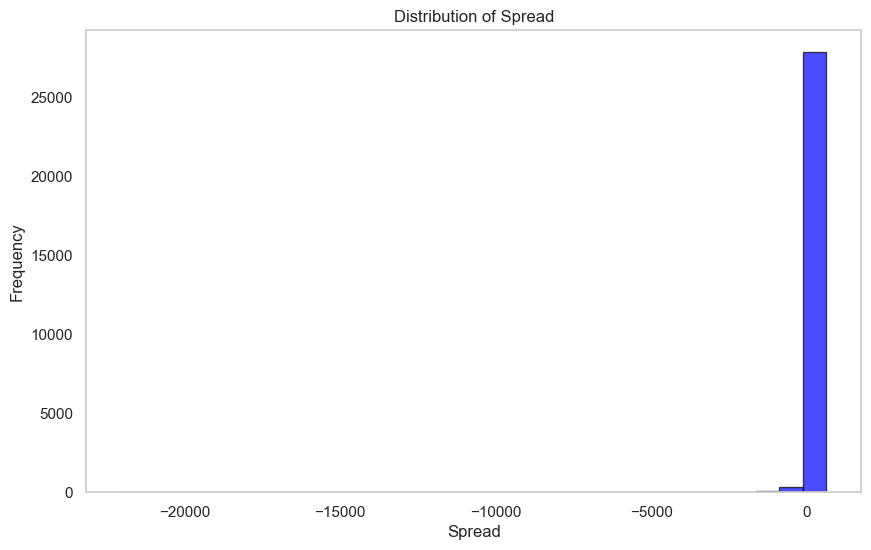

In [53]:
import matplotlib.pyplot as plt

# Create a histogram for the 'spread' column
plt.figure(figsize=(10, 6))
plt.hist(dfs['spread'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Spread')
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.grid()
plt.show()

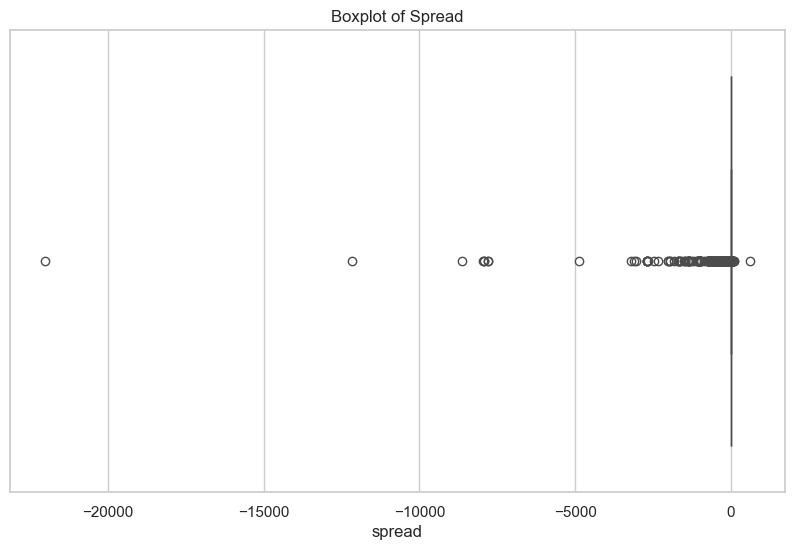

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=dfs['spread'])
plt.title('Boxplot of Spread')
plt.show()

In [55]:
dfs

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_last_bid,min_first_ask,spread
0,2024-10-22 11:20:42.711,1000.000,67427.200,67427.300,74170.100,67427.200,67427.300,True,True,0.100
1,2024-10-22 11:20:42.968,1000.000,67427.200,67427.300,69584.900,67427.200,67427.300,True,True,0.100
2,2024-10-22 11:20:43.220,1000.000,67433.900,67427.300,71679.000,67433.900,67427.300,True,True,-6.600
3,2024-10-22 11:20:43.467,1000.000,67433.900,67434.000,70131.300,67433.900,67434.000,True,True,0.100
4,2024-10-22 11:20:43.719,1000.000,67433.900,67434.000,73840.200,67433.900,67434.000,True,True,0.100
...,...,...,...,...,...,...,...,...,...,...
28321,2024-10-22 13:20:40.698,1000.000,67583.400,67580.000,74011.200,67583.400,67580.000,True,True,-3.400
28322,2024-10-22 13:20:40.950,1000.000,67583.400,67583.500,68916.600,67583.400,67583.500,True,True,0.100
28323,2024-10-22 13:20:41.202,1000.000,67583.400,67584.900,69635.900,67583.400,67584.900,True,True,1.500
28324,2024-10-22 13:20:41.458,1000.000,67583.400,67583.500,70293.700,67583.400,67583.500,True,True,0.100


In [71]:
# Counting spread <0.1
count_smaller_than_minus_0_1 = (dfs['spread'] < -0.1).sum()
print(f"Spread < -0.1: {count_smaller_than_minus_0_1}")

# Convert the 'spread' column to float
dfs['spread'] = dfs['spread'].astype(float)

# Create a range of values from -1 to 1 with a step of 0.1
spread_values = [round(x, 1) for x in np.arange(-1, 1.1, 0.1)]

# Count occurrences for each spread value
spread_counts = {value: (dfs['spread'] == value).sum() for value in spread_values}

# Print the counts
for value, count in spread_counts.items():
    print(f"Spread {value}: {count}")

count_bigger_than_0_1 = (dfs['spread'] > 0.1).sum()
print(f"Spread > 0.1: {count_bigger_than_0_1}")

print(f"Spread count : {total_rows}")

Spread < -0.1: 4448
Spread -1.0: 56
Spread -0.9: 72
Spread -0.8: 42
Spread -0.7: 53
Spread -0.6: 55
Spread -0.5: 57
Spread -0.4: 43
Spread -0.3: 60
Spread -0.2: 78
Spread -0.1: 136
Spread -0.0: 1476
Spread 0.1: 18634
Spread 0.2: 126
Spread 0.3: 54
Spread 0.4: 55
Spread 0.5: 48
Spread 0.6: 38
Spread 0.7: 47
Spread 0.8: 61
Spread 0.9: 43
Spread 1.0: 47
Spread > 0.1: 3631
Spread count : 28325


C:\Users\pc\AppData\Local\Temp\ipykernel_5600\1077367018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['spread'] = dfs['spread'].astype(float)


## 2nd data

In [17]:
# Read the Parquet file
# df_2 = pd.read_parquet('Binance_BTCUSDT_2024-06-30_1d_BOOK_SNAPSHOTS.parquet')
df_2 = pd.read_parquet('Binance_ETHUSDT_2024-06-30_1d_BOOK_SNAPSHOTS.parquet')

# Print the DataFrame
df_2

,ts,bp,bq,ap,aq
0,2024-06-30 02:34:52.370000+00:00,"[3369.4, 3369.32, 3369.28, 3369.27, 3369.26, 3...","[4.8023, 5.0488, 6.8572, 3.7882, 0.0177, 0.003...","[3369.41, 3369.44, 3369.45, 3369.46, 3369.49, ...","[88.2883, 0.5, 3.5564, 0.0296, 4.0027, 1.4383,..."
1,2024-06-30 02:34:52.470000+00:00,"[3369.4, 3369.32, 3369.28, 3369.27, 3369.26, 3...","[4.8023, 5.0488, 6.8572, 3.7882, 0.0177, 0.003...","[3369.41, 3369.44, 3369.45, 3369.46, 3369.49, ...","[88.2883, 0.5, 3.5564, 0.0296, 4.0027, 1.4383,..."
2,2024-06-30 02:34:52.770000+00:00,"[3369.4, 3369.32, 3369.27, 3369.26, 3369.25, 3...","[4.8081, 14.1821, 0.919, 0.0177, 0.0038, 2.457...","[3369.41, 3369.44, 3369.45, 3369.46, 3369.49, ...","[88.2883, 0.5, 3.5564, 0.0296, 4.0027, 1.4383,..."
3,2024-06-30 02:34:52.970000+00:00,"[3369.4, 3369.38, 3369.32, 3369.27, 3369.26, 3...","[4.8081, 3.2258, 10.9865, 0.919, 0.0177, 0.003...","[3369.41, 3369.44, 3369.45, 3369.46, 3369.49, ...","[88.2883, 0.5, 3.5564, 0.0296, 4.0027, 1.4383,..."
4,2024-06-30 02:34:53.170000+00:00,"[3369.4, 3369.38, 3369.37, 3369.32, 3369.27, 3...","[14.9489, 3.2258, 0.5028, 5.0488, 0.919, 0.017...","[3369.41, 3369.43, 3369.44, 3369.45, 3369.46, ...","[84.5383, 5.9454, 0.5, 3.5564, 0.0296, 5.9454,..."
...,...,...,...,...,...
674028,2024-06-30 21:28:56.943000+00:00,"[3418.15, 3418.14, 3418.13, 3418.11, 3418.1, 3...","[50.1821, 0.6178, 13.4833, 0.9966, 0.0031, 5.8...","[3418.16, 3418.19, 3418.32, 3418.33, 3418.38, ...","[21.2405, 5.9442, 0.3514, 0.585, 4.8829, 3.696..."
674029,2024-06-30 21:28:57.043000+00:00,"[3418.15, 3418.14, 3418.13, 3418.11, 3418.1, 3...","[50.1821, 0.6178, 13.4833, 0.9966, 0.0031, 5.8...","[3418.16, 3418.19, 3418.32, 3418.33, 3418.38, ...","[21.2405, 5.9442, 0.3514, 0.585, 4.8829, 3.696..."
674030,2024-06-30 21:28:57.243000+00:00,"[3418.15, 3418.14, 3418.13, 3418.11, 3418.1, 3...","[50.1821, 0.6178, 13.4833, 0.9966, 0.0031, 5.8...","[3418.16, 3418.17, 3418.19, 3418.32, 3418.33, ...","[21.2505, 0.1291, 5.9442, 0.3514, 0.585, 4.882..."
674031,2024-06-30 21:28:57.843000+00:00,"[3418.15, 3418.14, 3418.13, 3418.11, 3418.1, 3...","[50.1821, 0.6178, 13.4833, 0.9966, 0.0031, 5.8...","[3418.16, 3418.17, 3418.19, 3418.32, 3418.33, ...","[21.2504, 0.1291, 5.9442, 0.3514, 0.585, 4.882..."


In [18]:
# Convert the 'ts' column to datetime if it is not already in datetime format
df_2['ts'] = pd.to_datetime(df_2['ts'])

filtered_df_2 = df_2

In [78]:
# # Fill this if u want to filter the timestamp

# # Define the time range
# start_time = '2024-06-30 11:20:00'
# end_time = '2024-06-30 13:20:00'

# # Filter the DataFrame
# filtered_df_2 = df_2[(df_2['ts'] >= start_time) & (df_2['ts'] <= end_time)]

# # Print the filtered DataFrame
# filtered_df_2

,ts,bp,bq,ap,aq
92118,2024-06-30 11:20:00.049000+08:00,"[60823.96, 60823.72, 60822.56, 60822.0, 60820....","[1.83397, 0.00411, 0.0001, 0.0789, 0.00017, 0....","[60823.97, 60823.98, 60824.0, 60825.23, 60825....","[14.38366, 0.3, 0.0789, 0.00164, 0.07723, 0.35..."
92119,2024-06-30 11:20:00.149000+08:00,"[60823.96, 60823.72, 60823.0, 60822.56, 60822....","[1.83223, 0.00411, 0.1314, 0.0001, 0.0789, 0.0...","[60823.97, 60823.98, 60824.0, 60825.23, 60825....","[14.38326, 0.3, 0.0789, 0.00164, 0.07723, 0.35..."
92120,2024-06-30 11:20:00.249000+08:00,"[60823.96, 60823.72, 60823.0, 60822.56, 60822....","[1.83223, 0.00411, 0.1314, 0.0001, 0.0789, 0.0...","[60823.97, 60823.98, 60824.0, 60825.23, 60825....","[14.38326, 0.3, 0.0789, 0.00164, 0.07723, 0.01..."
92121,2024-06-30 11:20:00.349000+08:00,"[60823.96, 60823.72, 60823.0, 60822.56, 60822....","[1.83223, 0.00411, 0.1314, 0.0001, 0.0789, 0.0...","[60823.97, 60823.98, 60824.0, 60825.23, 60825....","[14.38326, 0.3, 0.0789, 0.00164, 0.07723, 0.01..."
92122,2024-06-30 11:20:00.449000+08:00,"[60823.96, 60823.72, 60823.0, 60822.56, 60822....","[1.83213, 0.00411, 0.1314, 0.0001, 0.0789, 0.0...","[60823.97, 60823.98, 60824.0, 60825.23, 60825....","[14.38353, 0.3, 0.0789, 0.00164, 0.07723, 0.01..."
...,...,...,...,...,...
144950,2024-06-30 13:19:59.179000+08:00,"[60725.3, 60725.29, 60725.12, 60725.06, 60725....","[5.14604, 0.0988, 0.00015, 0.0988, 0.00048, 9e...","[60725.31, 60725.36, 60725.56, 60725.91, 60725...","[13.4272, 0.07927, 0.00164, 0.00677, 0.14942, ..."
144951,2024-06-30 13:19:59.479000+08:00,"[60725.3, 60725.29, 60725.12, 60725.06, 60725....","[5.14604, 0.0988, 0.00015, 0.0988, 0.00048, 9e...","[60725.31, 60725.36, 60725.56, 60725.91, 60725...","[13.42621, 0.07927, 0.00164, 0.00677, 0.14942,..."
144952,2024-06-30 13:19:59.580000+08:00,"[60725.3, 60725.29, 60725.12, 60725.06, 60725....","[5.14604, 0.0988, 0.00015, 0.0988, 0.00048, 9e...","[60725.31, 60725.36, 60725.56, 60725.91, 60725...","[13.42719, 0.07927, 0.00164, 0.00677, 0.14942,..."
144953,2024-06-30 13:19:59.780000+08:00,"[60725.3, 60725.29, 60725.12, 60725.06, 60725....","[5.14604, 0.0988, 0.00015, 0.0988, 0.00048, 9e...","[60725.31, 60725.36, 60725.56, 60725.91, 60725...","[13.42757, 0.07927, 0.00164, 0.00677, 0.14942,..."


In [19]:
# Initialize the new dataframe 'dfs_2' with the 'ts' column from filtered_df_2
dfs_2 = pd.DataFrame()
dfs_2['ts'] = filtered_df_2['ts']

# Extract the first and last bid prices (first and last element of each list in 'bp')
dfs_2['first_bid'] = filtered_df_2['bp'].apply(lambda x: x[0] if len(x) > 0 else None)
dfs_2['last_bid'] = filtered_df_2['bp'].apply(lambda x: x[-1] if len(x) > 0 else None)

# Extract the first and last ask prices (first and last element of each list in 'ap')
dfs_2['first_ask'] = filtered_df_2['ap'].apply(lambda x: x[0] if len(x) > 0 else None)
dfs_2['last_ask'] = filtered_df_2['ap'].apply(lambda x: x[-1] if len(x) > 0 else None)

# Get the max of the 'bp' list
dfs_2['max_bid'] = filtered_df_2['bp'].apply(lambda x: max(x) if len(x) > 0 else None)

# Get the min of the 'ap' list
dfs_2['min_ask'] = filtered_df_2['ap'].apply(lambda x: min(x) if len(x) > 0 else None)

# Checking if the last bid is equal to the max bid
dfs_2['max_first_bid'] = dfs_2['first_bid'] == dfs_2['max_bid']

# Checking if the first ask is equal to the min ask
dfs_2['min_first_ask'] = dfs_2['first_ask'] == dfs_2['min_ask']

# Show the result
dfs_2

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_first_bid,min_first_ask
0,2024-06-30 02:34:52.370000+00:00,3369.40,3367.26,3369.41,3371.22,3369.40,3369.41,True,True
1,2024-06-30 02:34:52.470000+00:00,3369.40,3367.26,3369.41,3371.20,3369.40,3369.41,True,True
2,2024-06-30 02:34:52.770000+00:00,3369.40,3367.26,3369.41,3371.20,3369.40,3369.41,True,True
3,2024-06-30 02:34:52.970000+00:00,3369.40,3367.30,3369.41,3371.20,3369.40,3369.41,True,True
4,2024-06-30 02:34:53.170000+00:00,3369.40,3367.35,3369.41,3371.14,3369.40,3369.41,True,True
...,...,...,...,...,...,...,...,...,...
674028,2024-06-30 21:28:56.943000+00:00,3418.15,3416.58,3418.16,3419.97,3418.15,3418.16,True,True
674029,2024-06-30 21:28:57.043000+00:00,3418.15,3416.58,3418.16,3419.98,3418.15,3418.16,True,True
674030,2024-06-30 21:28:57.243000+00:00,3418.15,3416.58,3418.16,3419.97,3418.15,3418.16,True,True
674031,2024-06-30 21:28:57.843000+00:00,3418.15,3416.58,3418.16,3419.97,3418.15,3418.16,True,True


In [20]:
# Filter rows where 'last_bid' is None or 'first_ask' is None
false_dfs_2 = dfs_2[(dfs_2['last_bid'].isna()) | (dfs_2['first_ask'].isna())]

# Show the result
false_dfs_2

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_first_bid,min_first_ask


In [21]:
# Calculate spread and percentage
dfs_2['spread'] = dfs_2['min_ask'] - dfs_2['max_bid']

dfs_2['spread_perc'] = dfs_2['spread'] / dfs_2['max_bid'] * 100
dfs_2

,ts,first_bid,last_bid,first_ask,last_ask,max_bid,min_ask,max_first_bid,min_first_ask,spread,spread_perc
0,2024-06-30 02:34:52.370000+00:00,3369.40,3367.26,3369.41,3371.22,3369.40,3369.41,True,True,0.01,0.000297
1,2024-06-30 02:34:52.470000+00:00,3369.40,3367.26,3369.41,3371.20,3369.40,3369.41,True,True,0.01,0.000297
2,2024-06-30 02:34:52.770000+00:00,3369.40,3367.26,3369.41,3371.20,3369.40,3369.41,True,True,0.01,0.000297
3,2024-06-30 02:34:52.970000+00:00,3369.40,3367.30,3369.41,3371.20,3369.40,3369.41,True,True,0.01,0.000297
4,2024-06-30 02:34:53.170000+00:00,3369.40,3367.35,3369.41,3371.14,3369.40,3369.41,True,True,0.01,0.000297
...,...,...,...,...,...,...,...,...,...,...,...
674028,2024-06-30 21:28:56.943000+00:00,3418.15,3416.58,3418.16,3419.97,3418.15,3418.16,True,True,0.01,0.000293
674029,2024-06-30 21:28:57.043000+00:00,3418.15,3416.58,3418.16,3419.98,3418.15,3418.16,True,True,0.01,0.000293
674030,2024-06-30 21:28:57.243000+00:00,3418.15,3416.58,3418.16,3419.97,3418.15,3418.16,True,True,0.01,0.000293
674031,2024-06-30 21:28:57.843000+00:00,3418.15,3416.58,3418.16,3419.97,3418.15,3418.16,True,True,0.01,0.000293


In [22]:
# Count negative spread
negative_spread_count = (dfs_2['spread'] < 0).sum()
total_rows = len(dfs_2)
percentage_negative_spread = (negative_spread_count / total_rows) * 100

print(f"Number of rows with a negative spread: {negative_spread_count} | "
      f"Percentage: {percentage_negative_spread:.2f}%")

Number of rows with a negative spread: 0 | Percentage: 0.00%


In [23]:
# Calculate statistics
average_spread = dfs_2['spread'].mean()
max_spread = dfs_2['spread'].max()
min_spread = dfs_2['spread'].min()

print(f'Average Spread: {average_spread}')
print(f'Max Spread: {max_spread}')
print(f'Min Spread: {min_spread}')

Average Spread: 0.010094757971799349
Max Spread: 1.9200000000000728
Min Spread: 0.009999999999763531


In [24]:
# Calculate statistics
average_spread_perc = dfs_2['spread_perc'].mean()
max_spread_perc = dfs_2['spread_perc'].max()
min_spread_perc = dfs_2['spread_perc'].min()

print(f'Average Spread: {average_spread_perc}')
print(f'Max Spread: {max_spread_perc}')
print(f'Min Spread: {min_spread_perc}')

Average Spread: 0.0002971639243656068
Max Spread: 0.05618980447704186
Min Spread: 0.0002890181763594195


In [26]:
# Round the spread and spread_perc values to a consistent number of decimal places (e.g., 2 for spread, 6 for spread_perc)
dfs_2['spread_rounded'] = dfs_2['spread'].round(2)
dfs_2['spread_perc_rounded'] = dfs_2['spread_perc'].round(6)

# Generate the cleaned frequency tables
spread_freq_table = dfs_2['spread_rounded'].value_counts().sort_index()
spread_perc_freq_table = dfs_2['spread_perc_rounded'].value_counts().sort_index()

# Display the cleaned frequency tables
print("Spread Frequency Table (Rounded):\n", spread_freq_table)
print("\nSpread Percentage Frequency Table (Rounded):\n", spread_perc_freq_table)

Spread Frequency Table (Rounded):
 spread_rounded
0.01    673394
0.02       101
0.03        66
0.04        77
0.05        49
0.06        39
0.07        34
0.08        29
0.09        28
0.10        22
0.11        20
0.12        24
0.13        19
0.14        16
0.15         8
0.16        10
0.17         5
0.18         5
0.19         7
0.20         6
0.21         4
0.22         8
0.23         6
0.24         2
0.25         5
0.26         2
0.27         2
0.28         3
0.29         5
0.30         1
0.31         2
0.33         1
0.34         1
0.35         3
0.36         1
0.37         1
0.38         1
0.39         1
0.41         2
0.43         1
0.44         1
0.45         3
0.46         1
0.49         1
0.54         1
0.56         1
0.57         1
0.66         1
0.70         1
0.77         1
0.79         1
0.82         1
0.90         1
1.02         1
1.08         1
1.09         1
1.13         2
1.23         1
1.92         1
Name: count, dtype: int64

Spread Percentage Frequency Table (Rou

In [27]:
# Total count of rows in the dataset
total_rows = len(dfs_2)

# Most frequent spread
most_spread = spread_freq_table.idxmax()
most_spread_count = spread_freq_table.max()
most_spread_perc = (most_spread_count / total_rows) * 100

# Most frequent spread_perc
most_spread_perc_val = spread_perc_freq_table.idxmax()
most_spread_perc_count = spread_perc_freq_table.max()
most_spread_perc_perc = (most_spread_perc_count / total_rows) * 100

# Count and percentage of spread_perc >= 0.02
spread_perc_above_02_count = dfs_2[dfs_2['spread_perc_rounded'] >= 0.02].shape[0]
spread_perc_above_02_perc = (spread_perc_above_02_count / total_rows) * 100

# Output the results
print(f"Most Spread: {most_spread} : {most_spread_perc:.2f}% ({most_spread_count} occurrences)")
print(f"Most Spread Perc: {most_spread_perc_val} : {most_spread_perc_perc:.2f}% ({most_spread_perc_count} occurrences)")
print(f"Spread Perc >= 0.02 : {spread_perc_above_02_perc:.2f}% ({spread_perc_above_02_count} occurrences)")

Most Spread: 0.01 : 99.91% (673394 occurrences)
Most Spread Perc: 0.000295 : 30.61% (206353 occurrences)
Spread Perc >= 0.02 : 0.00% (12 occurrences)


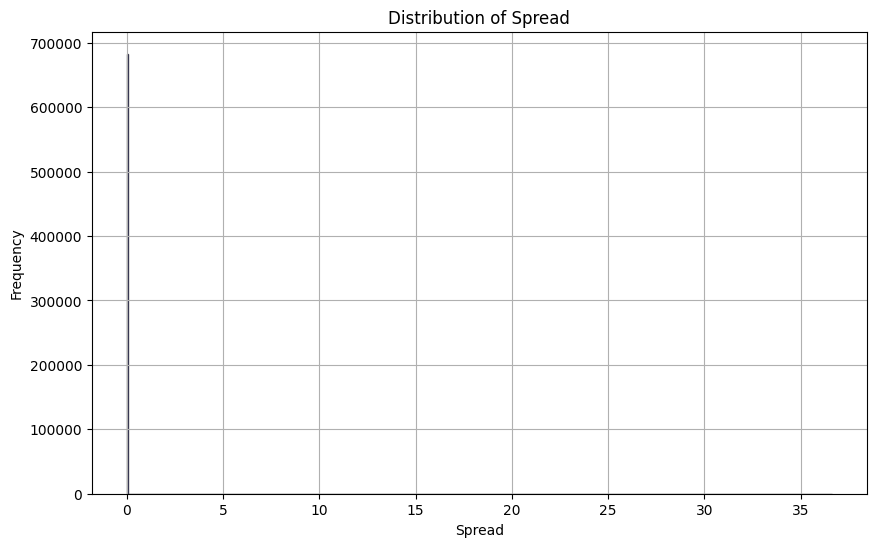

In [10]:
import matplotlib.pyplot as plt

# Create a histogram for the 'spread' column
plt.figure(figsize=(10, 6))
plt.hist(dfs_2['spread'], bins=1000, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Spread')
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.grid()
plt.show()

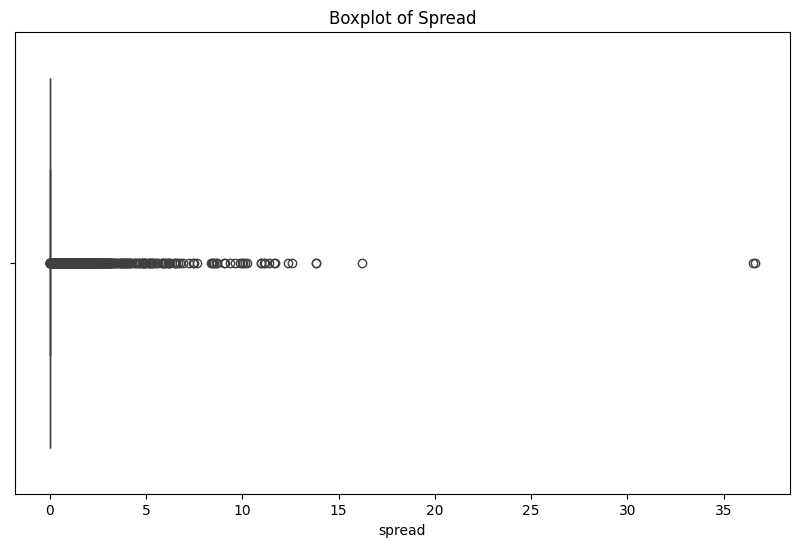

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=dfs_2['spread'])
plt.title('Boxplot of Spread')
plt.show()

In [12]:
dfs_2['spread'].unique()

array([1.00000000e-02, 9.99999999e-03, 2.00000000e-02, 1.40000000e-01,
       4.40000000e-01, 1.90000000e-01, 1.29000000e+00, 1.33000000e+00,
       6.50000000e-01, 1.11000000e+00, 8.10000000e-01, 2.59000000e+00,
       3.50000000e+00, 2.90000000e-01, 7.00000000e-02, 5.00000000e-01,
       1.60000000e-01, 1.60000000e-01, 1.73000000e+00, 1.10000000e-01,
       3.90000000e-01, 8.50000000e-01, 3.00000000e-02, 2.00000000e-01,
       2.00000000e-02, 5.10000000e-01, 2.51000000e+00, 4.80000000e-01,
       2.40000000e+00, 7.60000000e-01, 2.60000000e-01, 1.20000000e-01,
       1.09000000e+00, 8.60000000e-01, 3.00000000e-01, 5.70000000e-01,
       5.38000000e+00, 2.43000000e+00, 7.40000000e-01, 1.92000000e+00,
       1.07000000e+00, 9.60000000e-01, 1.05000000e+00, 1.06000000e+00,
       1.78000000e+00, 1.35000000e+00, 2.30000000e-01, 1.08000000e+00,
       2.05000000e+00, 4.18000000e+00, 4.20000000e-01, 5.40000000e-01,
       1.53000000e+00, 1.32000000e+00, 4.50000000e-01, 2.77000000e+00,
      

In [127]:
# Round the spread values to 3 decimal places
dfs_2['spread'] = dfs_2['spread'].round(3)

# Recalculate the frequency count
spread_distribution = dfs_2['spread'].value_counts().sort_index()

# Print the spread distribution again
print(spread_distribution)

total_row_2 = len(dfs_2)
print(f"row count: {total_row_2}")

spread
0.01    52820
0.02        2
0.08        1
0.16        1
0.23        1
0.26        1
0.40        1
0.43        1
0.47        1
0.79        1
0.89        1
1.12        1
1.27        1
1.36        1
1.65        1
2.96        1
3.00        1
Name: count, dtype: int64
row count: 52837
